## Calc CT Values

In [22]:
# import dep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
input_file = "18hr_mt_pink1_park_gapdh_06292020.xls"
gene = 'park'
house_keeping = 'gapdh'

In [55]:
# read raw excel file and separte sheets into dfs
xls = pd.ExcelFile(input_file)
# df1 = pd.read_excel(xls, 'Sample Setup')
df2 = pd.read_excel(xls, 'Results')
# df3 = pd.read_excel(xls, 'Raw Data')
# df4 = pd.read_excel(xls, 'Multicomponent Data')
# df5 = pd.read_excel(xls, 'Amplification Data')

# reset column names and clean df 
index_name = pd.Index((df2.iloc[6]).to_list())
index = df2.drop(df2.index[range(7)])
index.columns = index_name

# # select only what you need and drop na
# index = index[['Well', 'Sample Name', 'Target Name', 'Cт', 'Cт Mean', 'Cт SD']].dropna()

In [56]:
# def a gene select processing function that prints the output
gene1 = index.loc[index['Target Name'] == gene].reset_index()
housekeeping = index.loc[index['Target Name'] == house_keeping].reset_index()

# reads in triplicates or reads in duplicates
select_gene1 = gene1.loc[::2]
select_housekeeping = housekeeping.loc[::2]

# delta_ct and  then select first delta_ct value
delta_ct = (select_gene1['Cт Mean']-select_housekeeping['Cт Mean'])
first_delta_ct = delta_ct.iloc[0]

# delta delta ct
delta_ct2 = delta_ct - first_delta_ct

# fold change
fold_change = 2**(-delta_ct2)
gene1_list = [select_gene1['Sample Name'], select_gene1['Target Name'],
              delta_ct, delta_ct2, fold_change]
output = pd.DataFrame(gene1_list).transpose()
output.columns = ['Sample Name', 'Target Name', 
                           'Avg Delta CT', 'Delta Delta CT', 'Fold Inc']

# output save
# output.to_excel(r'/Users/shayonkeating/Documents/Sadikot_Lab/qPCR_output/qPCR.xlsx', index = False)

In [57]:
output1 = output[0:4]

### Bar plot

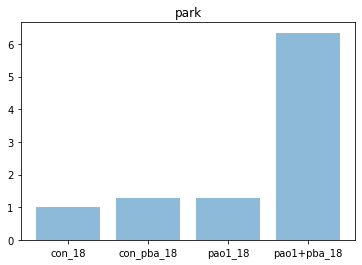

In [58]:
sample_name = output1["Sample Name"]
fold_inc = output1["Fold Inc"]
plt.bar(sample_name, fold_inc, align='center', alpha=0.5)
plt.title(f"{gene}")

plt.savefig('gene.png', dpi = 500)